In [89]:
import numpy as np
import pandas as pd
import seaborn as sn

inputs = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
                  [1,0,0],[1,0,1],[1,1,0],[1,1,1]]) 
target = [0,0,0,0,1,1,1,1]

w = np.array([1,-1,-1])
b = np.array([-0.5])

In [106]:
def perceptron(i,w,b):
    y = (w*i).sum() + b
    return y


In [107]:
y_predict = []
for inps in inputs:
    y = perceptron(inps,w,b)
    if y >= 0:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [108]:
y_predict

[0, 0, 0, 0, 1, 0, 0, 0]

In [109]:
TP = 0
TN = 0
FP = 0
FN = 0
for act,pre in zip(target,y_predict):
    if act == 0 and pre == 0:
        TP += 1
    elif act == 0 and pre == 1:
        FN += 1
    elif act == 1 and pre == 0:
        FP += 1
    elif act == 1 and pre == 1:
        TN += 1

In [110]:
def precision(TP,FP):
    return TP/(TP+FP) if (TP+FP) else 0

def recall(TP,FN):
    return TP/(TP+FN) if (TP+FN) else 0

pre = precision(TP,FP)
rec = recall(TP,FN)

In [111]:
a = 1/pre if pre else 0
b = 1/rec if rec else 0
F1 = 2 * (1/(a+b) if (a+b) else 0)

In [112]:
F1

0.7272727272727273

Predicted  0  1
Actual         
0          4  0
1          3  1


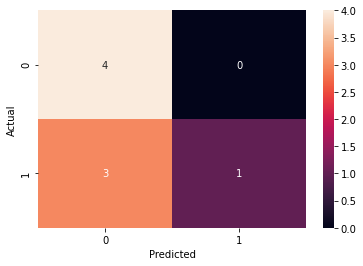

In [113]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual': target,
        'y_Predicted': y_predict
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()